# Classification
CNN 활용

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# 1. 데이터 로드 및 전처리
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 픽셀 값을 0-1 범위로 정규화
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 레이블을 원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. CNN 모델 생성
model = models.Sequential()

# 첫 번째 합성곱층과 최대 풀링층
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 두 번째 합성곱층과 최대 풀링층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱층과 최대 풀링층
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 밀집층(fully connected layer)으로 변환
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 3. 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# 5. 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 197s 1us/step


c:\vscode_workspace\industrial_ai\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3161 - loss: 1.8525 - val_accuracy: 0.5034 - val_loss: 1.3817
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5267 - loss: 1.3177 - val_accuracy: 0.5894 - val_loss: 1.1549
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6007 - loss: 1.1328 - val_accuracy: 0.6094 - val_loss: 1.1040
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6375 - loss: 1.0293 - val_accuracy: 0.6418 - val_loss: 1.0298
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6701 - loss: 0.9466 - val_accuracy: 0.6623 - val_loss: 0.9767
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6885 - loss: 0.8940 - val_accuracy: 0.6577 - val_loss: 0.9723
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7102 - loss: 0.8369 - val_accuracy: 0.6781 - val_loss: 0.9345
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7198 - loss: 0.7940 - val_accuracy: 0.

In [5]:
# 테스트 데이터에서 몇 개의 이미지 선택
num_images = 10
indices = np.random.choice(np.arange(X_test.shape[0]), num_images, replace=False)
sample_images = X_test[indices]
sample_labels = y_test[indices]

In [6]:
# 모델을 사용한 예측
predictions = model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


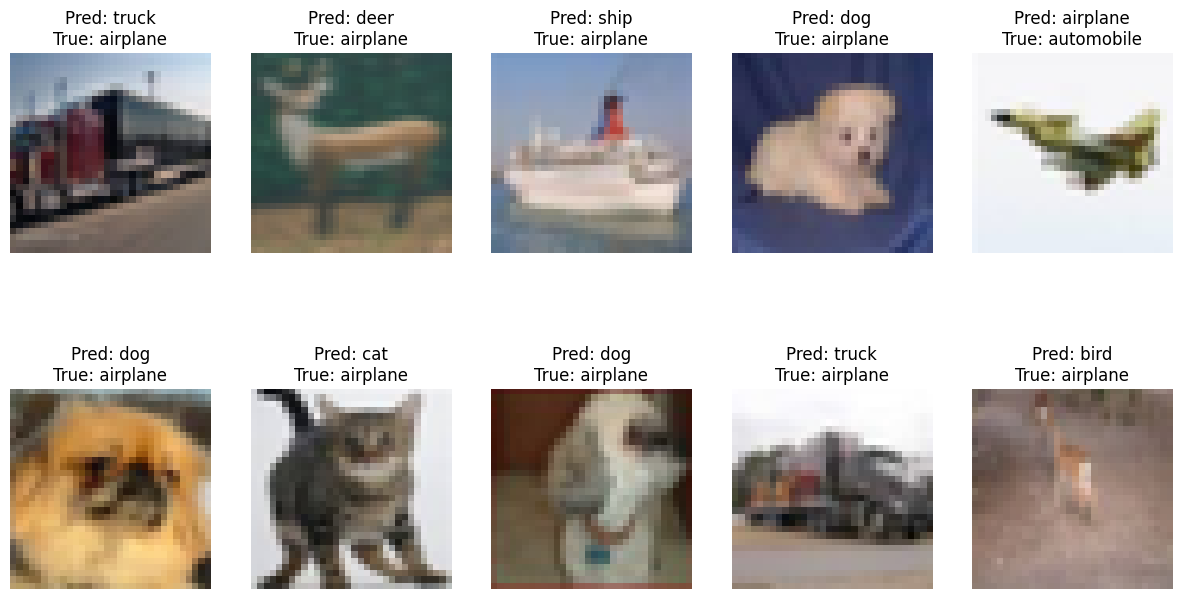

In [9]:
# CIFAR-10 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 결과 시각화
plt.figure(figsize=(15, 8))
for i in range(num_images):
    plt.subplot(2, num_images//2, i + 1)
    plt.imshow(sample_images[i])
    pred_label = int(np.argmax(predictions[i]))  # 예측값을 정수형으로 변환
    true_label = int(sample_labels[i][0])  # 실제 레이블을 정수형으로 변환
    plt.title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')
plt.show()